# Deep learning

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mathbf{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jiwoo Choi (jiwoochoi@inha.edu) </div>_

<br>

___

<br>

## Artificial Intelligence (AI)

- Computer systems designed to mimic human intelligence.
- Includes traditional methods like rule-based systems and classical computer vision techniques.
    - Examples: Edge detection, Camera Calibration
- Encompasses subsets such as machine learning and reinforcement learning.

<br>

<center>
<img src="https://jonghank.github.io/ase3001/files/almldl.png" alt="Description of the image" width="500" />
</center>

<br>

## Machine Learning

- A subset of AI that enables computers to perform specific tasks by learning from data.
- Involves extracting features and using them to carry out tasks:
    - The process of feature extraction is often performed manually by humans.
    - Examples include decision trees, support vector machines, and basic clustering techniques.
    
In the previous class, we discussed machine learning. Today, we will focus on deep learning.

## Deep Learning

- A specialized branch of machine learning.

<br>

<center>
<img src="https://jonghank.github.io/ase3001/files/cat.png" alt="Description of the image" width="600" />
</center>

<br>

- Relies on deep neural networks to learn and perform tasks directly from raw data.
- The ultimate goal of deep learning is to find the optimal parameters $\theta^*$ that best approximate the mapping from input $x$ to output $y$:

<br>

$$\theta^* = \underset{\theta}{\text{argmin}} \ \mathbf{L}(y, f_\text{NN}(x; \theta))$$

<br>

- We can find $\theta^*$ through a process called learning.
- Learning? This involves optimizing the model parameters $\theta$ by minimizing the loss function $\mathbf{L}$, which measures the difference between the predicted output and the true output.
- Usually gradient decent method is applied to find $\theta^*$. The pseudo code of the gradient descent algorithm for finding a (locally) optimal solution minimizing $\mathbf{L}$ is as follows,

<br>

$$
\begin{array}{l}
\textbf{initialize } x, \textbf{and set } \eta>0\\
\textbf{for } i \leftarrow 1 \textbf{ to } \text{maxiter} \textbf{ do} \\
\quad \theta \leftarrow \theta - \eta \nabla_\theta \mathbf{L}(x; \theta); \\
\textbf{end}
\end{array}
$$

<br>

- Automates the process of feature extraction by using layered architectures.
    - Multi-Layer Perceptron (MLP), Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs) etc.
    - Today, we will use the MLP architecture to design our model

<br>

### Multi-Layer Perceptron (MLP)

- One of the most well-known deep learning architectures.
- Composed of a combination of linear transformations and activation functions to capture non-linear relationships in the data:
    - Activation functions introduce non-linearity, enabling the MLP to learn more complex patterns in the data.
    - Compared to linear models like Support Vector Machines (SVMs) used in traditional machine learning, MLPs can represent more complex decision boundaries and adapt to a wider variety of tasks.
    - Common activation functions include:
        - **ReLU**: Rectified Linear Unit, widely used for its simplicity and effectiveness.
        - GELU: Gaussian Error Linear Unit, popular in transformer architectures.
        - Sigmoid: Used for mapping outputs to probabilities in certain contexts.
        - Tanh: Similar to sigmoid but outputs values between -1 and 1.
        
<br>

<center>
<img src="https://jonghank.github.io/ase3001/files/mlp.png" alt="Description of the image" width="700" />
</center>

<br>

---

<br>

## Supervised Learning

Learning is largely diveded into two parts: **Supervised Learning and Unspervised Learning**. We will focus on unsupervised learning in the assignment.

Supervised Learning is a methodology where a model is trained using input data $x$ and the corresponding labels $y$ to predict the correct output for a given input.
In supervised learning, the dataset includes labeled data, and the model learns the relationship between the inputs and outputs based on these labels.

When paired data $(x, y)$(input and corresponding output) is given, the objective is to find the optimal parameters $\theta$ of a model $f_\text{NN}$ that best approximates the mapping from $x$ to $y$. Depending on the nature of the output $y$ supervised learning can be broadly categorized into two types:

<br>

___

<br>

### 1. Classification

- Objective: Predict the class to which the data belongs.
- Output: Binary classification or multi-class classification.
- Examples:
    - Determining whether an email is spam or not.
    - Classifying images into categories such as cats, dogs, and rabbits.
- Loss Function: Commonly, Cross-Entropy Loss is used, defined as:

  $$\mathbf{L}(Y, P ) = -\frac{1}{N} \sum_{i=1}^N\sum_{j=1}^{N_c} y_{ij} \log p_{ij}$$

  where,
    - $N$: Number of data samples.
    - $N_c$: Number of classes
    - $Y = \bmat{y_1 & y_2& \cdots& y_N}^T$ where $y_i \in \mathbb{R}^{N_c}$ is the one-hot encoded true label vector for the $i$-th data sample.  

    - $P = \bmat{p_1 & p_2& \cdots& p_N}^T$ where $p_i \in \mathbb{R}^{N_c}$ is the predicted probability vector for each class for $i$-th data sample.


Here is an example classification problem.

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

from tqdm                    import tqdm
from sklearn.manifold        import TSNE
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device('cuda:0')

<br>

---

<br>

### Stellar Classification Dataset

The Stellar Classification Dataset (SDSS17) contains spectroscopic data of stars, galaxies, and quasars collected from the Sloan Digital Sky Survey (SDSS). It is commonly used for classifying astronomical objects. Below are the details for processing the dataset and building the training dataset.

#### Feature
1. `obj_ID`: Unique ID of the object.
2. `alpha`: Right Ascension (RA) of the celestial sphere.
3. `delta`: Declination (Dec) of the celestial sphere.
4. `u`, `g`, `r`, `i`, `z`: Magnitudes measured through five filters.
5. `class`: Classification of the object (STAR, GALAXY, QSO).
6. Miscellaneous (`plate`, `MJD`, `fiber_ID`): Reference data for SDSS.

<br>

#### 1) Data Preprocessing
1. Load the `archive.zip` File
    - Extract and load the required data for processing.

2. Split data into train data and test data.
$\phantom{.}$    
    
3. Normalization

    - Perform normalization on the features: `'u', 'g', 'r', 'i', 'z', 'alpha', 'delta', 'redshift'`.
    - The normalization process scales the data values to the range of 0 to 1 using the formula:  

    $$ \hat{x} = \frac{x - x_\text{min}}{x_\text{max} - x_\text{min}} $$

    - This ensures that no particular feature dominates the learning process, improving model stability and preventing overfitting.
    - Use the minimum and maximum values from the training set to normalize both the training and testing sets. This ensures consistency and prevents information leakage from the test set into the training process.
   
4. Convert `numpy` to `torch`
    - Convert the normalized features into `torch.FloatTensor` for compatibility with PyTorch.
    - Convert the class column into `torch.LongTensor` as it represents categorical data for classification.
    


In [3]:
## 1. load file
df = pd.read_csv('https://jonghank.github.io/ase3001/files/star_classification.csv')

selected = ['u', 'g', 'r', 'i', 'z', 'alpha', 'delta', 'redshift']
data = df[selected].to_numpy()
_cls = df['class'].to_numpy().copy()

tmp = np.unique(_cls)

# string class to integer
for idx, i in enumerate(tmp):
    _cls[_cls == i] = idx
#----------------------------#

## 2. train test split
X_train, X_test, y_train, y_test = train_test_split(
    data, _cls, test_size=0.2, random_state=42, stratify=_cls
)
#----------------------------#

## 3. normalization

_min = np.min(X_train, axis=0)
_max = np.max(X_train, axis=0)

X_train = (X_train - _min) / (_max - _min)
X_test  = (X_test - _min)  / (_max - _min)
#----------------------------#

## 4. numpy to torch
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train.astype(np.int32)))
test_dataset  = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test.astype(np.int32)))

train_dataloader = DataLoader(train_dataset,  batch_size=512, shuffle=True)
test_dataloader  = DataLoader(test_dataset,  batch_size=512, shuffle=True)

In [4]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


<br>

#### 2) Define the model, loss function and optimizer.

- Model
    - We use a Multi-Layer Perceptron (MLP) architecture for the model.
    - Input: the model takes the normalized features of `u`, `g`, `r`, `i`, `z`, `alpha`, `delta`, `redshift`
    - output: the model outputs logits for 3 classes (`STAR`, `GALAXY`, `QSO`).

- Loss function
    - We use Cross-Entropy Loss `torch.nn.CrossEntropyLoss` to train the model.
    - As mentioned before, this loss function is suitable for multi-class classification tasks as it computes the difference between predicted probabilities and true labels.

- Optimizer
    - We use the Adam optimizer `torch.optim.Adam` to optimize the model parameters. Adam is widely used for its adaptability and efficiency in deep learning tasks.


In [5]:
class custom_model(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()

        self.ilayer = nn.Linear(dim_in, 100)
        self.hlayer = nn.Linear(100, 200)
        self.olayer = nn.Linear(200, dim_out)

        self.act_func = nn.ReLU()

        return

    def forward(self, x):
        x = self.ilayer(x)
        x = self.act_func(x)
        x = self.hlayer(x)
        x = self.act_func(x)
        x = self.olayer(x)

        return x

In [6]:
lr = 1e-3

_input_model = {'dim_in': len(selected) ,
                'dim_out': 3}

model = custom_model(**_input_model).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-8)

losses = []
accs = []

AssertionError: Torch not compiled with CUDA enabled

<br>

#### 3) Training process repeats the following.

1. Gradient Initialization: Use `optimizer.zero_grad()` to reset the gradients calculated in the previous step.
2. Forward: pass the input data through the model to compute the prediction
3. Loss calculation: Calculate the loss by comparing the model's predictions with the actual labels.
4. Backward: Call `loss.backward()` to compute the gradients of the model parameters with respect to the loss.
5. Parameter Update: Use `optimizer.step()` to update the model parameters based on the computed gradients.

In [ ]:
def get_acc(model, dataloader, n_cls, device):
    model.eval()
    with torch.no_grad():
        cm  = np.zeros((n_cls,n_cls))

        for (_in, tgt) in dataloader:
            _in = _in.to(device)
            tgt = tgt.to(device)
            _out = model(_in)

            _, predicted = torch.max(_out, 1)

            for (i_p, i_r) in zip(predicted, tgt):
                cm[i_r, i_p] += 1

        acc = np.sum(np.diag(cm)) / np.sum(cm)

        tmp = np.sum(cm, axis=1)
        tf  = tmp != 0
        cm[tf] = cm[tf] / tmp[tf,np.newaxis]
    model.train()
    return acc, cm


In [ ]:
epoch = 500

model.train()
progress = tqdm(range(epoch))


for i in progress:
    batch_loss = 0

    for (_in, tgt) in train_dataloader:
        ## tensor: CPU -> GPU
        _in = _in.to(device)
        tgt = tgt.to(device)
        #---------------------------------------#

        optimizer.zero_grad()

        out = model(_in)

        loss = criterion(out, tgt)

        loss.backward()
        optimizer.step()
        batch_loss += loss.cpu().detach().item()

    losses.append(batch_loss / len(train_dataloader))

    acc = get_acc(model, train_dataloader, 3, device)[0]
    accs.append(acc)

    progress.set_description(f"Training Loss: {losses[-1]:e}" + f" Training Accuracy:{acc}")

Training Loss: 1.015370e-01 Training Accuracy:0.965525: 100%|██████████| 500/500 [39:42<00:00,  4.76s/it]


Text(0.5, 0, 'Iterations')

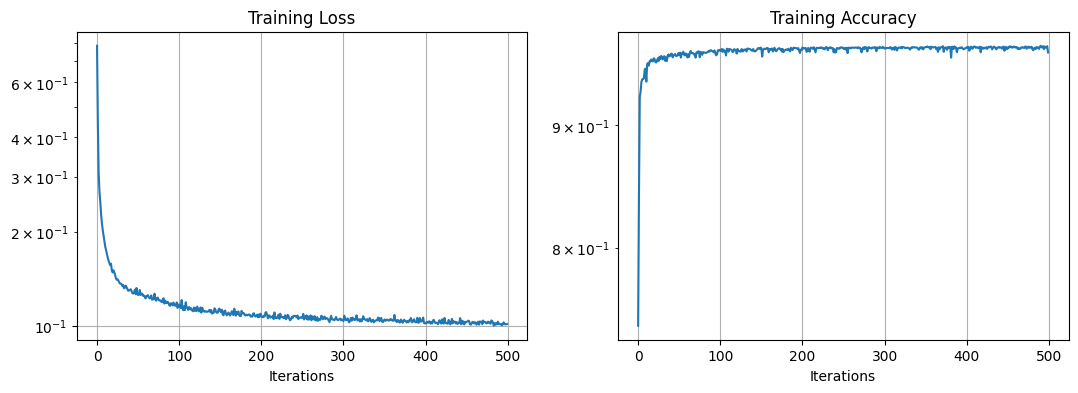

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(1.6*4*2,1*4), dpi=100)

ax = axes[0]

ax.semilogy(losses)
ax.set_title('Training Loss')
ax.grid()
ax.set_xlabel('Iterations')

ax = axes[1]

ax.semilogy(accs)
ax.set_title('Training Accuracy')
ax.grid()
ax.set_xlabel('Iterations')

<br>

#### 4) Predict the values with trained model

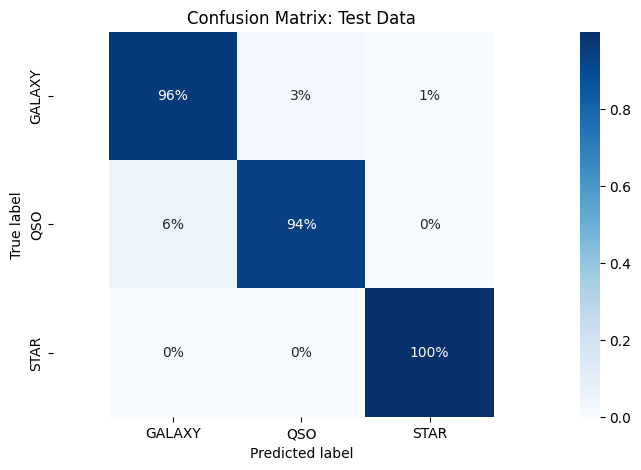

In [ ]:
acc, cm = get_acc(model, test_dataloader, 3, device)
#------------------------------------------------------#

labels = df['class'].unique()

size = 5
plt.figure(dpi=100, figsize=(1.6*size,size))
sns.heatmap(cm, annot=True , fmt='.0%',  cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.axis('equal')
plt.title('Confusion Matrix: Test Data')
plt.show()

<br>

___


<br>

### 2. Regression

- Objective: Predict continuous values.
- Output: Real-valued numbers.
- Examples:
    - Predicting weather conditions in a specific region.
    - Forecasting stock price movements.
    - Approximating a continuous function.
- Loss function:
    - Commonly used loss functions for regression tasks include:
      
      **Mean Squared Error(MSE)**

      $$\mathbf{L}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$$

      **Mean Absolute Error (MAE)**:

  $$\mathbf{L}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$$


<br>

### Learning an Archimedean Spiral

In this section, we train a deep model to approximate the given spiral defined by the parametric equations:

$$
\begin{aligned}
x &= \frac{1}{12} \theta \cos{\theta}\\
y &= \frac{1}{12} \theta \sin{\theta}
\end{aligned}
$$

<br>
Our objective is to design a model that takes $\theta$ as input and predicts the corresponding $(x, y)$ coordinates of the spiral.








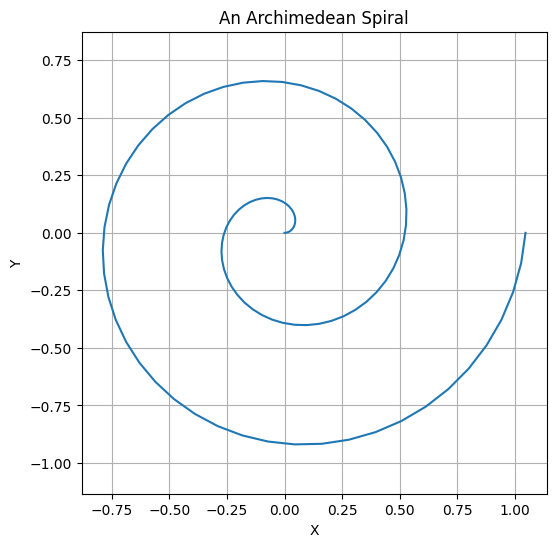

In [ ]:
theta = np.linspace(0, 4 * np.pi, 100)

x = theta / 12 * np.cos(theta)
y = theta / 12 * np.sin(theta)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, label='2D Spiral')
plt.title('An Archimedean Spiral')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

<br>

#### 1) Generate a training data

To start, we generate the spiral dataset using the parametric equations provided above. This dataset will serve as the ground truth for training the model. $\theta$ will be sampled over a specified range, and the corresponding $(x, y)$ coordinates will be computed.

In [ ]:
theta = np.linspace(0, 4 * np.pi, 50)

_in = torch.FloatTensor(theta)[:,None]

x = theta / 12 * np.cos(theta)
y = theta / 12 * np.sin(theta)

out = np.hstack([x[:,None], y[:,None]])
out = torch.FloatTensor(out)

train_dataset = TensorDataset(_in, out)
train_dataloader = DataLoader(train_dataset, batch_size=512)

<br>

#### 2)  Define the model, loss function and optimizer.

We define a neural network model to map $\theta$ to $(x, y)$. we use `nn.MSELoss()`, which minimizes the mean squared error between the predicted and actual coordinates. The optimizer is identical to the one used previously.


In [ ]:
class custom_model(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()

        self.ilayer = nn.Linear(dim_in, 1000)
        self.hlayer = nn.Linear(1000, 500)
        self.olayer = nn.Linear(500, dim_out)

        self.act_func = nn.ReLU()

        return

    def forward(self, x):
        x = self.ilayer(x)
        x = self.act_func(x)
        x = self.hlayer(x)
        x = self.act_func(x)
        x = self.olayer(x)

        return x

In [ ]:
lr = 1e-3

_input_model = {'dim_in': 1 ,
                'dim_out': 2}

model = custom_model(**_input_model).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-8)

losses = []

<br>

#### 3) Train model.

The training process follows a structure similar to the above classification task.

In [ ]:
epoch = 30000

model.train()
progress = tqdm(range(epoch))


for i in progress:
    batch_loss = 0

    for (_in, tgt) in train_dataloader:
        ## tensor: CPU -> GPU
        _in = _in.to(device)
        tgt = tgt.to(device)
        #---------------------------------------#
        optimizer.zero_grad()

        out = model(_in)

        loss = criterion(out, tgt)

        loss.backward()
        optimizer.step()
        batch_loss += loss.cpu().detach().item()

    losses.append(batch_loss / len(train_dataloader))

    progress.set_description(f"Training Loss: {losses[-1]:e}")

Training Loss: 2.375615e-04: 100%|██████████| 30000/30000 [01:49<00:00, 273.19it/s]


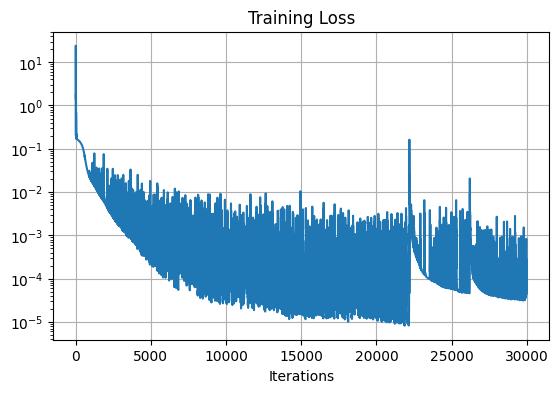

In [ ]:
plt.figure(figsize=(1.6*4,1*4), dpi=100)
plt.semilogy(losses)
plt.title('Training Loss')
plt.grid()
plt.xlabel('Iterations')
plt.show()

<br>

#### 4) Predict the values with trained model

Using the trained model, we predict the values of $(x, y)$ for both the trained points and a new set of test points.

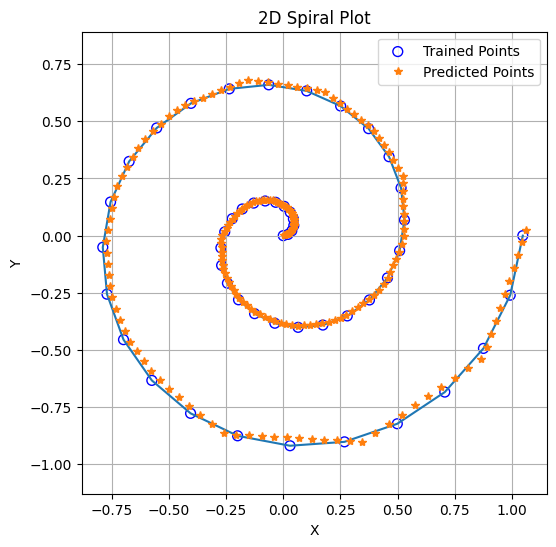

In [ ]:
theta = np.linspace(0, 4 * np.pi, 50)

x = theta / 12 * np.cos(theta)
y = theta / 12 * np.sin(theta)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y)
plt.scatter(x, y, s=50, facecolors='none', edgecolors='blue', label='Trained Points')

theta = np.linspace(0, 4 * np.pi, 200)
theta = torch.FloatTensor(theta[:,None]).to(device)

model.eval()

with torch.no_grad():
    out = model(theta).cpu().detach().numpy()

plt.plot(*out.T, '*', label='Predicted Points')

plt.title('2D Spiral Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()